# Three Things:  NumPy and Matplotlib

In [1]:
import numpy as np

In [2]:
# conda install numpy
# pip install numpy

In [3]:
# numpy:  1. convenient way to do math on sequences of data
#         2. efficient way to do that

## Make Arrays and Manipulate Them

In [4]:
arr = np.array([1,1,2,3,5,8,13])
arr

array([ 1,  1,  2,  3,  5,  8, 13])

In [5]:
arr * 10

array([ 10,  10,  20,  30,  50,  80, 130])

In [6]:
d = np.diag(np.arange(3))
d

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [7]:
np.tile(d, (2,2))

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 2, 0, 0, 2],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 2, 0, 0, 2]])

# Calculate Important Values on an Array

In [8]:
big_arr = np.tile(d, (2,3))
big_arr

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 2, 0, 0, 2, 0, 0, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 2, 0, 0, 2, 0, 0, 2]])

In [9]:
big_arr.sum()

18

In [10]:
big_arr.sum(axis=0)

array([0, 2, 4, 0, 2, 4, 0, 2, 4])

In [11]:
big_arr.sum(axis=1)

array([0, 3, 6, 0, 3, 6])

In [13]:
big_arr.min()

0

In [14]:
big_arr.mean(), big_arr.max()

(0.3333333333333333, 2)

# Graph Array Values

In [15]:
import matplotlib.pyplot as plt

In [16]:
# conda install matplotlib
# pip install matplotlib

In [17]:
x = np.linspace(0,10,11)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [18]:
y = 3 * x + 5  # y=mx+b

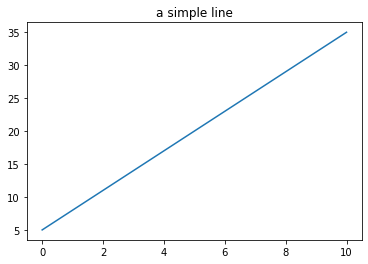

In [19]:
ax=plt.gca()
ax.plot(x,y)
ax.set_title('a simple line');

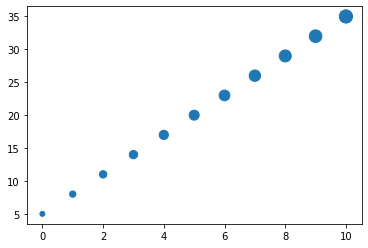

In [20]:
ax = plt.gca()
ax.scatter(x,y,s=5*y); # s= controls the size

# Three Things:  Pandas

In [21]:
import pandas as pd

In [22]:
# conda install pandas
# pip install pandas

## Create and Access by Name

In [23]:
df = pd.DataFrame({'number':[10,20,30],
                   'sport' :['cycling', 'hockey', 'cycling'],
                   'color' :['red', 'green', 'red']},
                  index=['barb', 'mark', 'ethan'])
df

,number,sport,color
barb,10,cycling,red
mark,20,hockey,green
ethan,30,cycling,red


In [24]:
df['color']

barb       red
mark     green
ethan      red
Name: color, dtype: object

In [25]:
df.color

barb       red
mark     green
ethan      red
Name: color, dtype: object

In [26]:
df['barb':'mark']

,number,sport,color
barb,10,cycling,red
mark,20,hockey,green


## Group Things Together and Calculate

In [28]:
df.groupby('color').get_group('red')

,number,sport,color
barb,10,cycling,red
ethan,30,cycling,red


In [29]:
df.groupby('color').get_group('green')

,number,sport,color
mark,20,hockey,green


In [30]:
df.groupby('color').number.sum()

color
green    20
red      40
Name: number, dtype: int64

In [31]:
pd.crosstab(df.color, df.sport)

sport,cycling,hockey
color,,
green,0,1
red,2,0


In [32]:
df

,number,sport,color
barb,10,cycling,red
mark,20,hockey,green
ethan,30,cycling,red


# Read and Explore Data

In [33]:
!cat simple_data.csv

name,shares,price
AA,100,35.08
IBM,50,179.62
CAT,150,96.76
MSFT,200,63.85
GE,95,29.79
GOOG,50,821.35
IBM,100,70.44
GOOG,50,286.07

In [35]:
df = pd.read_csv('simple_data.csv')
df

,name,shares,price
0,AA,100,35.08
1,IBM,50,179.62
2,CAT,150,96.76
3,MSFT,200,63.85
4,GE,95,29.79
5,GOOG,50,821.35
6,IBM,100,70.44
7,GOOG,50,286.07


In [36]:
df.describe()

,shares,price
count,8.000000,8.000000
mean,99.375000,197.870000
std,53.481472,266.193829
min,50.000000,29.790000
25%,50.000000,56.657500
50%,97.500000,83.600000
75%,112.500000,206.232500
max,200.000000,821.350000


In [37]:
df.describe(include=object)

,name
count,8
unique,6
top,GOOG
freq,2


In [38]:
df.name.value_counts()

GOOG    2
IBM     2
AA      1
CAT     1
GE      1
MSFT    1
Name: name, dtype: int64

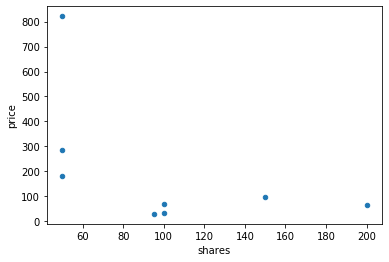

In [39]:
df.plot(kind='scatter', x='shares', y='price')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119ea73d0>,
      dtype=object)

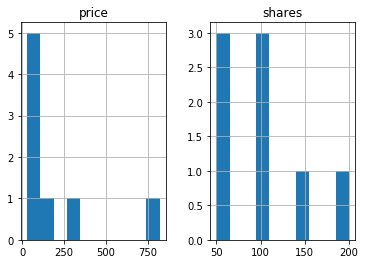

In [41]:
df.hist()

# Three Things:  Scikit-learn and Friends

In [42]:
from sklearn import (datasets, model_selection)

In [43]:
# conda install scikit-learn
# pip install scikit-learn

## Load Practice Dataset and Split

In [44]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, 
                       columns=iris.feature_names)
iris_df['tgt'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),tgt
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
part1, part2 = model_selection.train_test_split(iris_df)

In [46]:
len(iris_df)

150

In [47]:
len(part1), len(part2)

(112, 38)

## Build and Predict with sklearn

In [48]:
from sklearn import neighbors

In [49]:
my_model = neighbors.KNeighborsClassifier()
my_model.fit(part1.drop(columns='tgt'), part1.tgt)
my_model.predict(part2.drop(columns='tgt'))

array([2, 0, 1, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1,
       2, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2])

## Evaluating the Results

In [50]:
from sklearn import metrics

In [51]:
preds = my_model.predict(part2.drop(columns='tgt'))
metrics.accuracy_score(preds, part2.tgt)

0.9736842105263158

In [52]:
cm = metrics.confusion_matrix(part2.tgt, preds)

In [53]:
cm

array([[ 9,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [54]:
import seaborn as sns

In [55]:
# conda install seaborn
# pip install seaborn

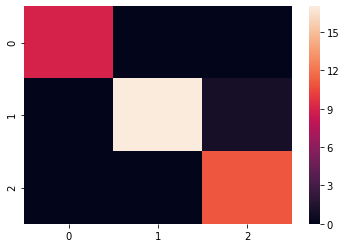

In [56]:
sns.heatmap(cm);